In [1]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [2]:
def preprocess_image(image_path):
    image = Image.open(image_path)

    gray_image = image.convert("L")

    enhancer = ImageEnhance.Sharpness(gray_image)
    sharp_image = enhancer.enhance(2.0)

    resized_image = sharp_image.resize((256, 256), Image.LANCZOS)

    enhancer = ImageEnhance.Sharpness(resized_image)
    final_image = enhancer.enhance(1.5)

    final_image_rgb = np.stack([np.array(final_image)] * 3, axis=-1)

    image_array = final_image_rgb / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    return image_array


In [3]:
def predict_new_image(model, image_path, class_names):
    image_array = preprocess_image(image_path)
    
    prediction = model.predict(image_array)
    
    predicted_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_index]
    probability = prediction[0][predicted_index]

    return predicted_class, probability


In [4]:
def predict_images_in_folder(model, folder_path, class_names):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            image_path = os.path.join(folder_path, filename)

            predicted_class, probability = predict_new_image(model, image_path, class_names)

            print(f"Image: {filename}, Predicted Class: {predicted_class}, Probability: {probability:.4f}")

            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(f"Predicted: {predicted_class} ({probability:.2%})")
            plt.axis('off')
            plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Image: 04ddad9c-049b-4ff2-931d-660a1cecf220.jpeg, Predicted Class: CNAM, Probability: 0.9998


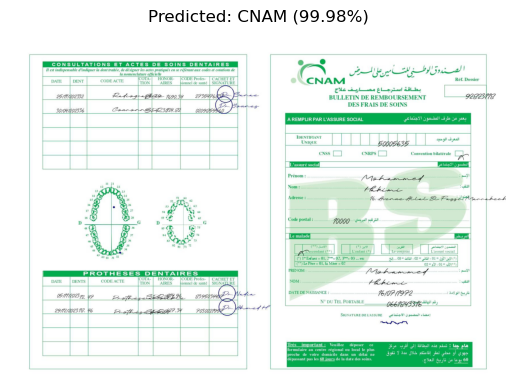

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Image: 0f0f186a-3ec2-423f-84ce-5c09aada2310.jpeg, Predicted Class: CNAM, Probability: 0.9999


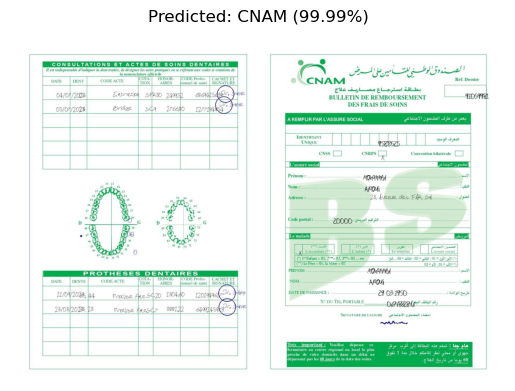

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Image: 125ecfab-152d-4273-999d-4a8c4e77ec98.jpeg, Predicted Class: CNAM, Probability: 0.9999


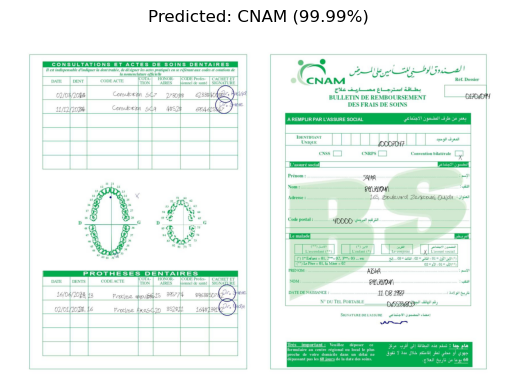

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Image: 1486--9550657--20230720_page_0.jpg, Predicted Class: STAR, Probability: 0.9999


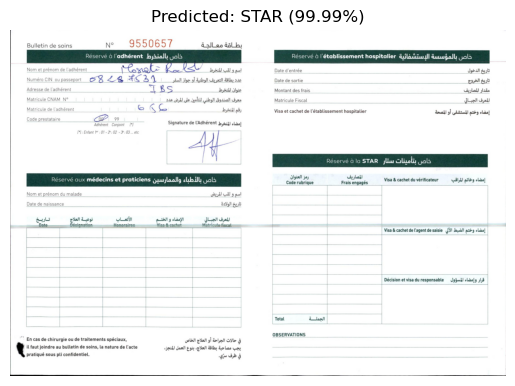

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Image: 1487--9550656--20230720_page_0.jpg, Predicted Class: STAR, Probability: 0.9999


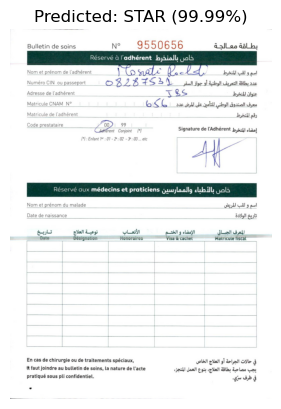

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Image: 1495--9550929--20230720_page_0.jpg, Predicted Class: STAR, Probability: 0.9997


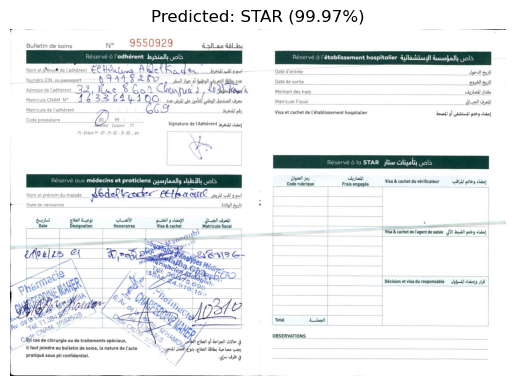

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Image: 1497--9550814--20230720_page_0.jpg, Predicted Class: STAR, Probability: 0.9999


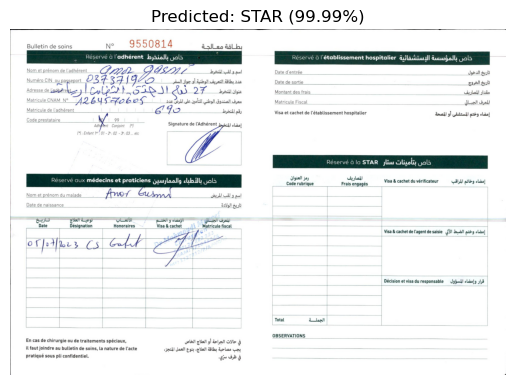

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Image: 2f2224eb-e6bf-406a-ba40-1cb9743375d5.jpeg, Predicted Class: CNAM, Probability: 0.9999


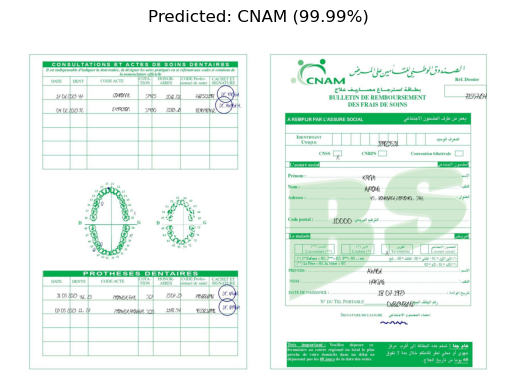

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Image: 4bf9c6ec-e088-4ea3-ad32-2febd88ad2f3.jpeg, Predicted Class: CNAM, Probability: 0.9999


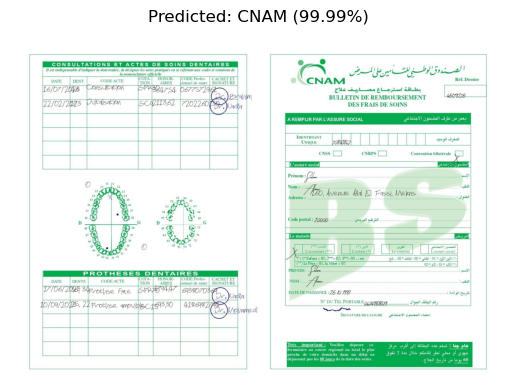

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Image: 6e0e8d74-adbe-41b0-8961-cca545526325.jpeg, Predicted Class: CNAM, Probability: 0.9999


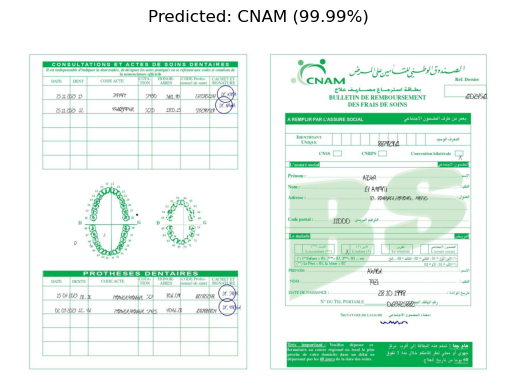

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Image: 92999e1e-724d-4d5d-9e57-d26b4d1f05d7.jpeg, Predicted Class: CNAM, Probability: 1.0000


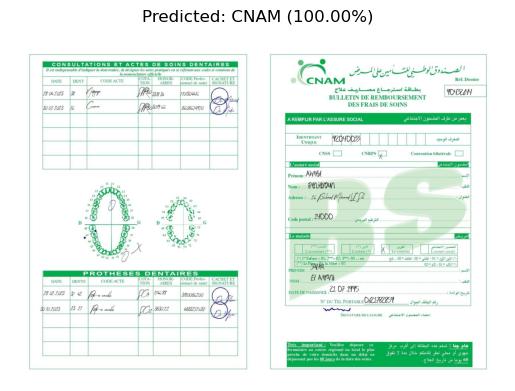

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Image: b099953e-1beb-4357-864b-84cfefd080a1.jpeg, Predicted Class: CNAM, Probability: 0.9999


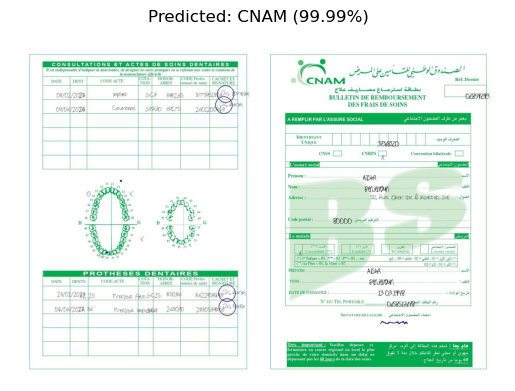

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Image: ee73ce24-e707-4c60-ab91-34ba8cbce25a.jpeg, Predicted Class: CNAM, Probability: 0.9999


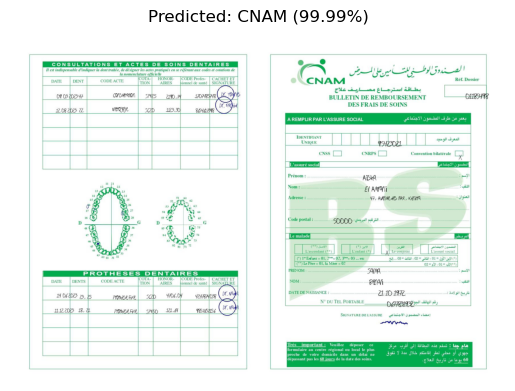

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Image: output_page_one_877.jpg, Predicted Class: BH, Probability: 0.9996


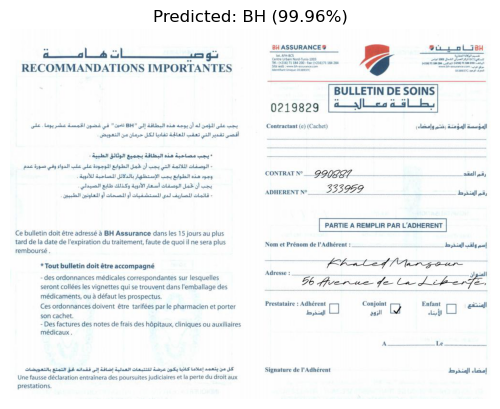

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Image: output_page_one_878.jpg, Predicted Class: BH, Probability: 0.9997


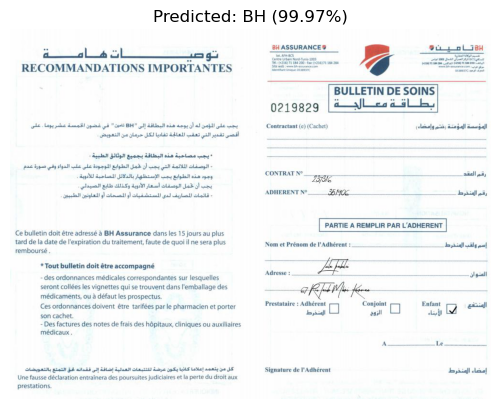

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Image: output_page_one_879.jpg, Predicted Class: BH, Probability: 0.9996


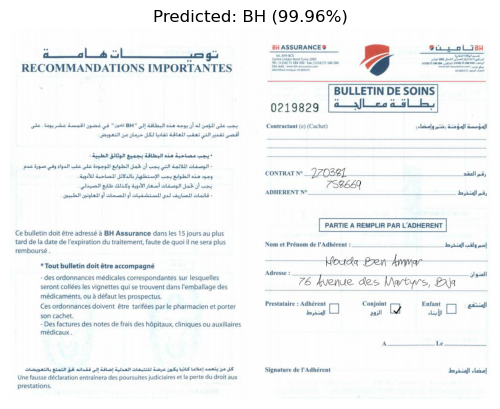

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Image: output_page_one_880.jpg, Predicted Class: BH, Probability: 0.9974


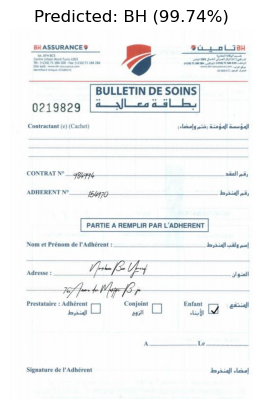

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Image: output_page_one_889.jpg, Predicted Class: BH, Probability: 0.9997


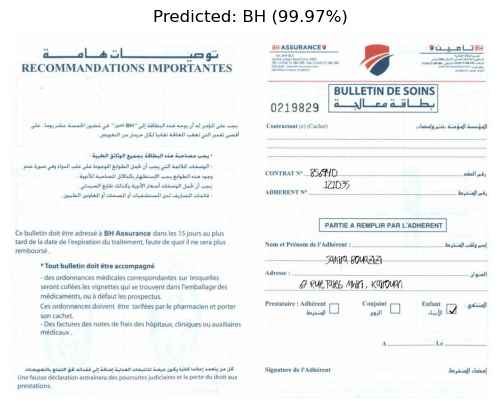

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Image: output_page_one_890.jpg, Predicted Class: BH, Probability: 0.9997


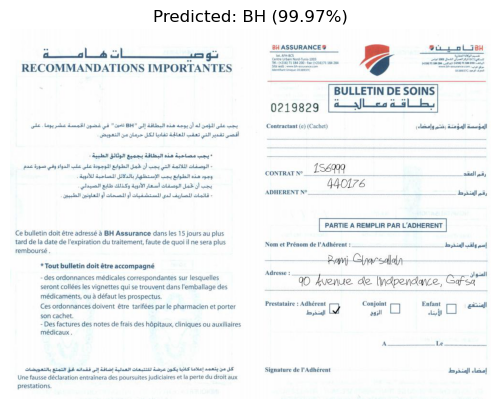

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Image: output_page_one_891.jpg, Predicted Class: BH, Probability: 0.9996


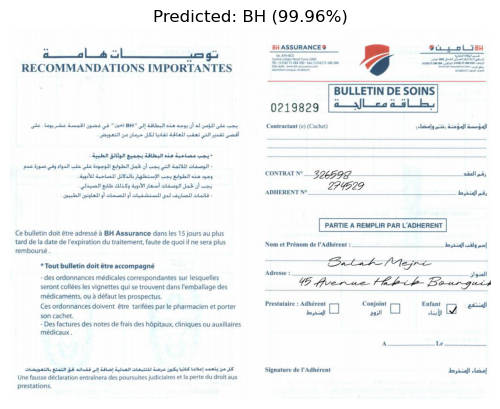

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Image: output_page_one_892.jpg, Predicted Class: BH, Probability: 0.9996


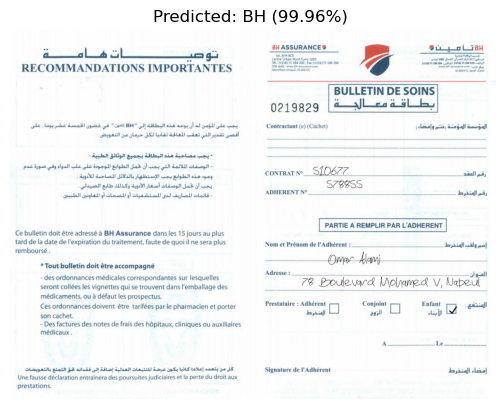

In [5]:
model = load_model("insurance_classifier_vgg16.h5")

class_names = ['BH', 'CNAM', 'STAR']  

test_folder = "output/"

predict_images_in_folder(model, test_folder, class_names)
